# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 8 </span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



Risolviamo in questa esercitazione un problema di ottimizzazione utilizzando un approccio variazionale. 

Il principio variazionale in Meccanica Quantistica afferma che il valore di aspettazione dell'Hamiltoniana su un stato di prova ha l'energia di ground state $E_0$ come limite inferiore: 

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

E assumerà un valore minimo, l'energia di Ground State in corrispondenza del ground state. 
Durante l'esercizio ottimizzeremo il ground state di una quantum particle un uno spazio 1D confinato nel seguente potenziale esterno: 
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Questo modello quantico 1D non è analiticamente solubile ma potrebbe essere approcciato numericamente. 

Per ottenere una funzione d'onda approssimata per il ground state nel metodo Variazionale Monte Carlo si costruiscono delle funzioni d'onda di prova, parametrizzate da un set di parametri variazionali. 

Un modello approssimato per il ground state è dato dalla seguente funzione di prova: 
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ dipende da due parametri variazionali. 
La ricerca dei parametri variazionaliverrà eseguita con il metodo del simulated annealing

# Esercizio 1
Scrivere un codice Monte Carlo per una single quantum particle in 1D che esegua *l'algoritmo di Metropolis algorithm per stampare il modulo quadrato della nostra funzione di prova $|\Psi_T^{\sigma,\mu}(x)|^2$* usando una probabilità di transizione $T(x_{new}|x_{old})$. Utilizzando il data blocking, il codice dovrebbe essere in grado di calcolare il valore di aspettazione per l'hamiltoniana
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

che può essere utilizzato per trovare i parametri che minimizzano questa quantità. Usiamo $\hbar = 1$ and $m=1$.

Avremo poi bisogno della stima analitica di
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

# Solution
Il metodo variazionale permette di definire l'energia di GS di un sistema quantistico. Per eseguire il calcolo abbiamo bisogno di sviluppare i calcoli precedenti per poter implementare un metodo computazionale. 
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = 
\int dx p(x) \frac{{\frac{-\hbar^2\partial^2}{2m\partial x^2} + V(x) } \Psi_T(x)}{\Psi_T(x)} = 
$$

Calcolando la derivata analiticamente 

$$
\frac{\partial^2}{\partial x^2} \psi_T(x) = 
     -\frac{1}{\sigma^2}\bigg[\bigg(\frac{x+\mu}{\sigma}\bigg)^2 e^{-\frac{x+\mu}{2\sigma}} +  \bigg(\frac{x-\mu}{\sigma}\bigg)^2  e^{-\frac{x-\mu}{2\sigma}} - e^{-\frac{x-\mu}{2\sigma}} -e^{-\frac{x+\mu}{2\sigma}}\bigg]
$$

Per cui otteniamo 

$$
\langle {\hat H} \rangle_T = \int dx p(x) E_{loc}(x) = \int dx p(x) \frac{\bigg[-\frac{\hbar^2}{2m\sigma^2}\bigg[\bigg(\frac{x+\mu}{\sigma}\bigg)^2 e^{-\frac{x+\mu}{2\sigma}} +  \bigg(\frac{x-\mu}{\sigma}\bigg)^2  e^{-\frac{x-\mu}{2\sigma}} - e^{-\frac{x-\mu}{2\sigma}} -e^{-\frac{x+\mu}{2\sigma}}\bigg] + V(x) \bigg] \Psi_T(x)}{\Psi_T(x)} 
$$

Osserviamo dunque che è possibile ricavare il valore dell'energia calcolando l'integrale della funzione $E_{loc}(x)$ utilizzando il metodo dell'importance sampling, estraendo valori di x con una densità di probabilità p(x), dove p(x) è campionata utilizzando l'algoritmo di metropolis sotto descritto. 

### $p(x)$ è l'algoritmo di Metropolis 

Si tratta di un algoritmo utilizzato per generare dei valori che distribuiti con prob $p(x)$, nota una $f(x)$ prop a $p (x)$
Si parte da una probabilità di transizione proposta: $T(x_{old}|x_{new})$ uniforme e nel nostro caso utilizziamo 
$f(x) = e^{-(x-\mu)^2/2\sigma^2} + e^{-(x+\mu)^2/(2\sigma^2)}$ 

L'algoritmo procede quindi nel seguente modo: 
- si estrae un nuovo valore x dalla distribuzione di proposta $T(x_{old}|x_{new})$;
- si calcola il rapporto $w = f (x_{new})/f(x_{old}) = p(x_{new})/p(x_{old})$ ;
- se $w > 1$ si accetta il nuovo valore $x^∗ = x_{new}$;
- se invece $w < 1$ il nuovo valore deve essere accettato con probabilità $w$. Si genera quindi un numero random $r$
   distribuito uniformemente nell'intervallo [ 0 , 1 ];
   - se $r < w$ si accetta il nuovo valore $x^∗ = x_{new}$ ;
   - altrimenti il nuovo valore viene rigettato e si pone $x^* = x_{old}$.

$p(x) = |\psi(x)|^2/N$: poichè poniamo la normalizzazione a 1 possiamo porre $|\psi(x)|^2 = p(x)$. 

Abbiamo implementato l'algoritmo nella funzione `Metropolis` e la $f(x)$ di test è implementata dalla funzione `Psi`
In questo primo esercizio è stato scritto l'algoritmo, applicato poi nell'esercizio successivo

# Esercizio 2
Per trovare i parametri $\sigma$ e $\mu$ che minimizzano $\langle {\hat H} \rangle_T$, estendiamo il nostro codice variazionale Monte Carlo per affrontare un problama di ottimizzazione tramite in algoritmo di *Simulated Annealing (SA)*. 
Scegliamo una appropriata temperatura iniziale e un adeguato criterio di evoluzione della temperatura. Calcoliamo quindi il valore $\langle {\hat H} \rangle_T$ con sufficiente statistica.

## Simulated annealing 
Questo metodo stabilisce una analogia con la termodinamica: l'idea del metodo è quella di utilizzare l'energia del sistema come funzione costo e di simulare. 
Così come in un sistema statistico, per esempio un liquido, raggiunge la propria configurazione di minima energia "raffreddandosi" lentamente, si simula in questo esercizio un raffreddamento del sistema per giungere a determinare l'energia minima. 
L'idea è quindi quella di far variare $\beta = 1/T$ con il tempo, partendo da una configurazione iniziale. 

l'algoritmo è inizializzato a una configurazione $x_0$ e esegue $n_1$ step Monte Carlo alla temperatura $1/\beta_1$, e così via per $n_N$ steps si performa l'algoritmo ad una temperatura $\beta_N$. 
La configurazione finale di ogni ciclo è usata come inizio per la configurazione successiva. Matematicamente questo processo è una catena di Markov.

Nello specifico l'algoritmo si struttura in questo modo: 
- si assegnano dei valori di partenza di $\mu$ e $\sigma$ e si calcola l'energia associata al sistema. 
- Si fissa un valore di temperatura a cui lavorare e si definisce un intervallo di esplorazione dei parametri che definisce di quanto far variare i parametri $\mu$ e $\sigma$. Questo viene fissato in funzione della temperatura $delta_{ann} = 1. /\sqrt{\beta}$. In questo modo per valori alti di temperatura (e quindi bassi di $\beta$) si esplorerà un intervallo più ampio di valori, mentre man mano che il sistema viene "raffreddato" si restringe il campo di ricerca. 
- si calcola un nuovo valore di energia quella temperatura, tramite un importance sampling, utilizzando un campionamento con densità di probabilità definita utilizzando l'algoritmo di metropolis
- si accetta il nuovo valore di $\mu$ e $\sigma$ con probabilità definita $$
p = \begin{cases}
  e^{-\beta(E_{new} - E_{old})}& se\,\, E_{new} > E_{old} \\
 1 & se\,\, E_{new} \leq E_{old}
\end{cases}$$
in questo modo ad alte temperature sia che si vada contro gradiente che seguendo il gradiente la probabilità di accettazione della mossa sarà quasi totale, mentre a basse temperature sono accettare sempre solamente mosse che portano a minimizzare l'energia
- Si calcola la precisione della misura

Si ripete l'algoritmo, impostando la media a blocchi. Con blocchi di $L =15$ e numero di blocchi inizialmente non definito, ma che dipende dalla precisione con cui si vuole identificare l'energia di GS. 


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Parte 1: mostrare $\langle {\hat H} \rangle_T$ in funzione degli step di SA

Il primo punto dell'esercizio consiste nel mostrare un grafico dell'andamento del valor medio dell'energia con la relativa incertezza in funzione del numeri di step del SA. 
Per impostare il calcolo impostiamo la media a blocchi, lasciando libero il numero di blocchi, in questo caso il numero di step del simulated aneealing su cui impostare il calcolo. 

Partendo da un valore di $\beta = 1.$ aumentiamone il valore in questo modo $\beta_{i+1} = \beta_i + 2.5$. 

Facciamo fermare l'algoritmo quando viene raggiunta una precisione di 0.0015. Ad ogni SA step salviamo la stima sull'energia determinata. 


Usciamo dall'algoritmo dopo 1069 steps, i valori per i parametri adeguati sono :
- $\mu =-0.810939$ 
- $\sigma =-0.628016$ 

In [9]:
mu, mu_err, sigma, sigma_err, H_gs, H_gs_err = np.loadtxt("SA_Results.dat", usecols=(0, 1, 2, 3, 4, 5), unpack='true')

In [6]:
print("Ground state Energy = " + str(H_gs ) + "+-" + str(H_gs_err) ) 

Ground state Energy = -0.436673+-0.00137501


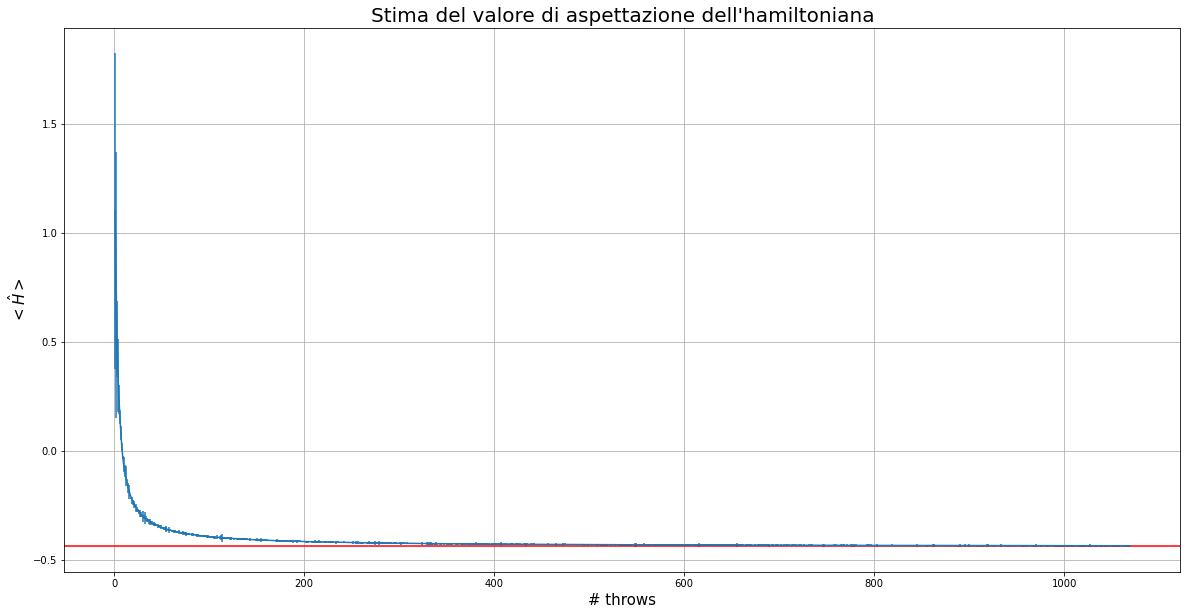

In [7]:
x, H_prog, err = np.loadtxt("Part_1_H_SA_steps.dat", usecols=(0, 1, 4), delimiter=None, unpack='true')
plt.figure(figsize=(20,10))
plt.title ("Stima del valore di aspettazione dell'hamiltoniana", fontsize = 20)
plt.errorbar(x, H_prog, err)
plt.axhline(y = H_gs, xmin=0, xmax=1000, color = 'red' )
plt.xlabel("# throws", fontsize = 15)
plt.ylabel("$< \hat{H}>$", fontsize = 15)
plt.grid()


Mostriamo un andamento ravvicinato del grafico al valor minimo dell'energia di GS

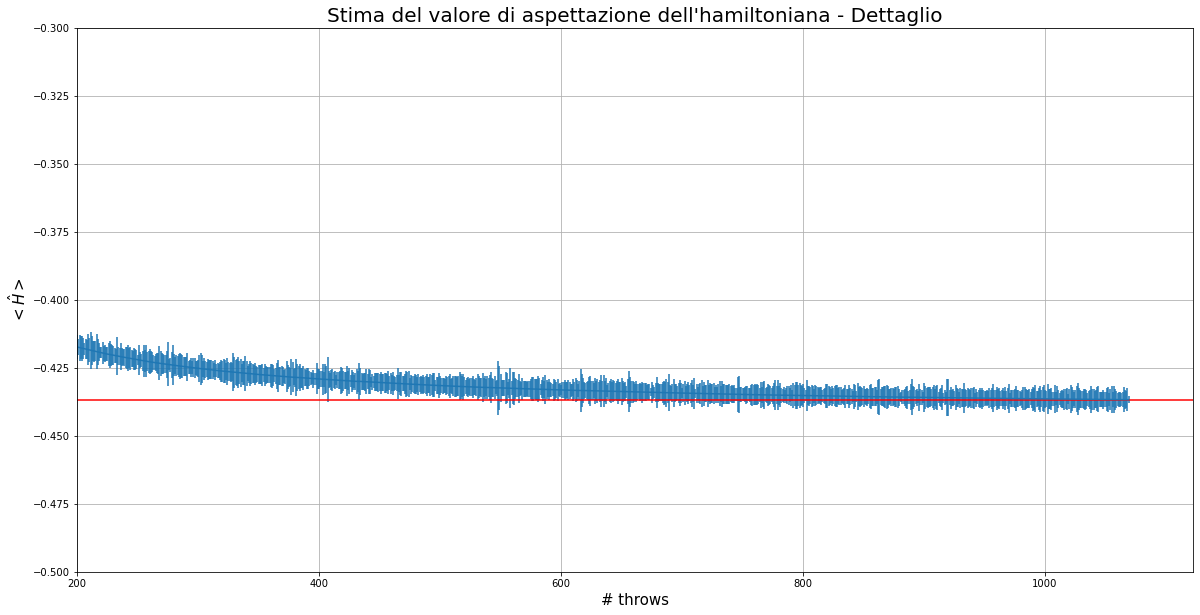

In [16]:
x, H_prog, err = np.loadtxt("Part_1_H_SA_steps.dat", usecols=(0, 1, 4), delimiter=None, unpack='true')
plt.figure(figsize=(20,10))
plt.title ("Stima del valore di aspettazione dell'hamiltoniana - Dettaglio", fontsize = 20)
plt.errorbar(x, H_prog, err)
plt.axhline(y = H_gs, xmin=0, xmax=1000, color = 'red' )
plt.xlabel("# throws", fontsize = 15)
plt.ylabel("$< \hat{H}>$", fontsize = 15)
plt.xlim (200)
plt.ylim ([-0.5, -0.3])
plt.grid()


## Osservazioni 


Osserviamo che il grafico ci illustra come dopo circa 600 blocchi il valore dell'energia di GS converga al valor minimo, entro le barre di errore definite. L'algorimo esce dal ciclo e raggiunge la precisione desiderata dopo circa 1000 step dell'algoritmo di SA. 

### Parte 2: mostrare la traiettoria dell'algoritmo di SA nello spazio variazionale dei parametri

Nel corso della simulazione precedente abbiamo salvato progressivamente tutti i valori dei parametri $\mu$ e $\sigma$ testati 

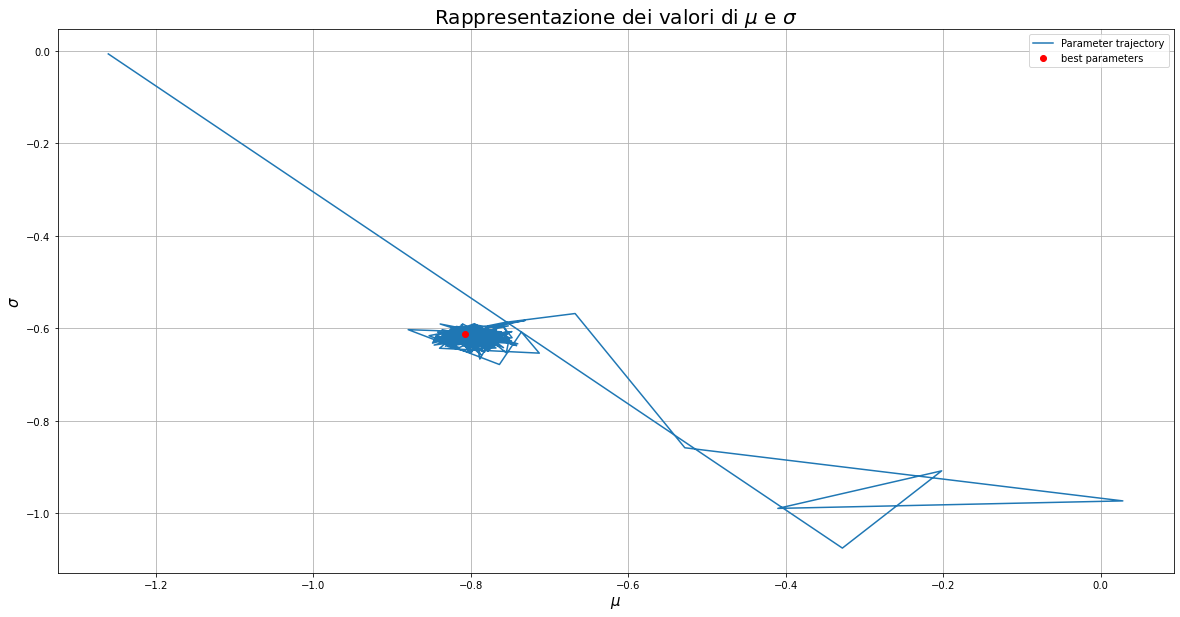

In [21]:
mus, sigmas = np.loadtxt("Part_2_mu_sigma.dat", usecols=(0, 1), delimiter=None, unpack='true')

mu_last = mus[-1]
sigma_last = sigmas[-1] 

plt.figure(figsize=(20,10))
plt.title ("Rappresentazione dei valori di $\mu$ e $\sigma$", fontsize = 20)
plt.plot(mus, sigmas, label = 'Parameter trajectory')
plt.plot(mu_last, sigma_last, 'o', color = 'red', label = 'best parameters')
plt.xlabel("$\mu$", fontsize = 15)
plt.ylabel("$\sigma$", fontsize = 15)
plt.legend()
plt.grid()

Il grafico ci mostra come l'algoritmo in pochi step raggiunge subito l'intorno di valori di $\mu$ e $\sigma$ che minimizzano $\langle \hat H\rangle$. 

Osserviamo come all'abbassarsi della temperatura si restringa il campo di ricerca dei parametri

### Parte 3: mostrare una figura della stima di $\langle {\hat H} \rangle_T$ e della sua incertezza come funzione del numero di blocchi per i valori di parametri che minimizzano $\langle {\hat H} \rangle_T$</span> 

Fissiamo i valori di $\mu$ e $\sigma$ con i valori trovati all'esercizio precedente e grafichiamo la stima del valore di aspettazione su un numero $N = 1000$ di blocchi da $L = 100$. 

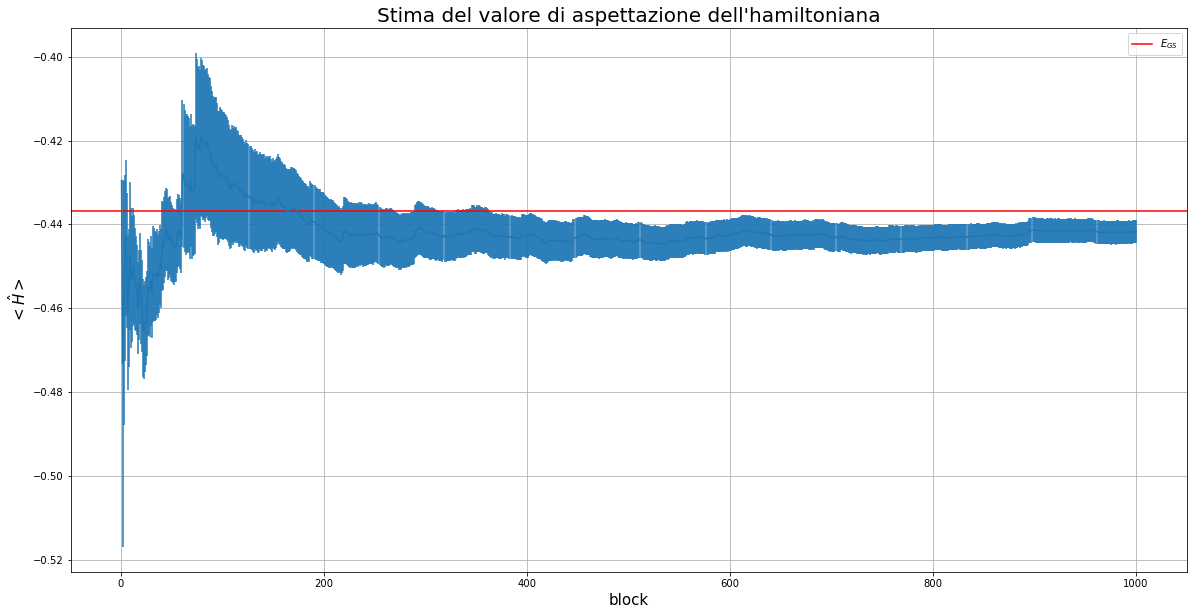

In [11]:
x, H_prog, err = np.loadtxt("Part_3_H_nblk.dat", usecols=(0, 1, 2),  unpack='true')
plt.figure(figsize=(20,10))
plt.title ("Stima del valore di aspettazione dell'hamiltoniana", fontsize = 20)
plt.errorbar(x, H_prog, err)
plt.axhline(y = H_gs, xmin=0, xmax=1000, color = 'red', label = "$E_{GS}$" )
plt.xlabel("block", fontsize = 15)
plt.ylabel("$< \hat{ H}>$", fontsize = 15)
plt.legend()
plt.grid()

### Parte 4 : Stampa dei valori di $|\Psi_T(x)|^2$ riempiendo un istogramma 

Fissiamo i parametri $\mu$ e $\sigma$ e stampiamo un numero $N = 50000$ di valori di $p(x)$ utilizzando l'algoritmo di Metropolis precedentemente implementato. 

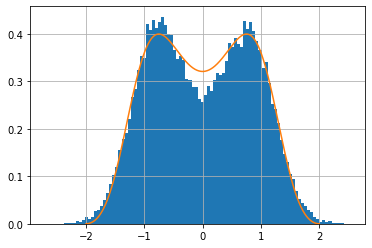

In [41]:
data = np.loadtxt("Part_4_psi_modulus_squared.dat", usecols=(0), delimiter=None, unpack='true')

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 4
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = np.abs(psi/np.sqrt(dx))**2

plt.hist(data, 100, density = True )
         #range = (-a/2,a/2) )
#plt.hist(data_2, 50, density = True, range = (-a/2,a/2) )
plt.plot(x, psi[0])
plt.grid()
plt.show()

Osserviamo che l'algoritmo di metropolis ci permette di campionare adeguatamente l'andamento della densità di probabilità richiesta. Un aumento del numero di valori ci permetterebbe di ottenere una stima probabilmente migliore. 